# Preprocessing et analyses

In [1]:
# Import de toutes les librairies nécessaires au projet
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')
df_dic = pd.read_csv('data-dictionary.csv')
df.head()
#with pd.option_context('display.max_rows', None):
#    print(df.to_string())

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df_dic.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [6]:
df_uniques = pd.DataFrame([[col, len(df[col].unique()) ] for col in df.columns],columns = ['Variable','nb_uniques']).set_index('Variable')
df_uniques

,nb_uniques
Variable,
country,167
child_mort,139
exports,147
health,147
imports,151
income,156
inflation,156
life_expec,127
total_fer,138


In [7]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<AxesSubplot:>

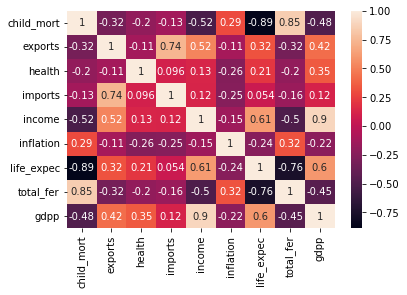

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df.corr(),annot=True)

In [9]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.27,40.33,2.60,8.25,19.30,62.10,208.00
exports,167.0,41.11,27.41,0.11,23.80,35.00,51.35,200.00
health,167.0,6.82,2.75,1.81,4.92,6.32,8.60,17.90
imports,167.0,46.89,24.21,0.07,30.20,43.30,58.75,174.00
income,167.0,17144.69,19278.07,609.00,3355.00,9960.00,22800.00,125000.00
inflation,167.0,7.78,10.57,-4.21,1.81,5.39,10.75,104.00
life_expec,167.0,70.56,8.89,32.10,65.30,73.10,76.80,82.80
total_fer,167.0,2.95,1.51,1.15,1.80,2.41,3.88,7.49
gdpp,167.0,12964.16,18328.70,231.00,1330.00,4660.00,14050.00,105000.00


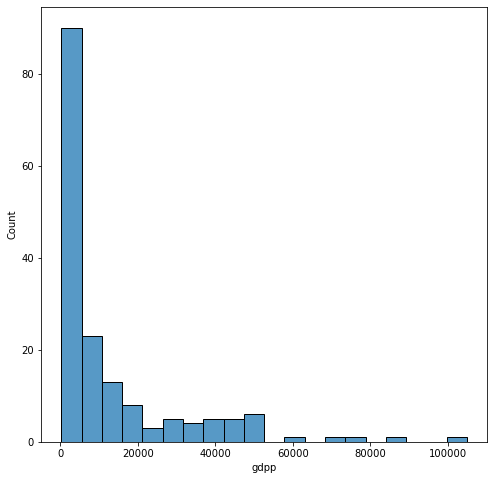

In [10]:
plt.figure(figsize=(8,8))
sns.histplot(df['gdpp'],bins=20)
plt.show()

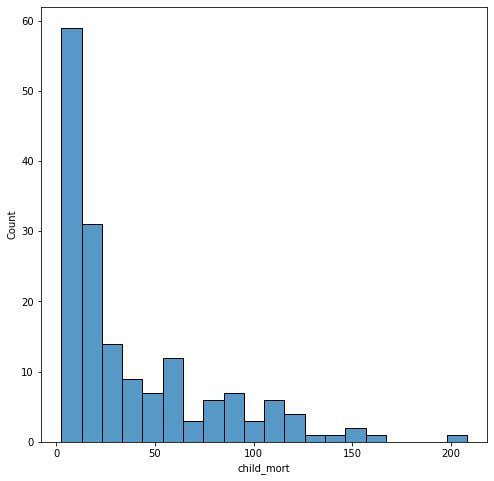

In [11]:
plt.figure(figsize=(8,8))
sns.histplot(df['child_mort'],bins=20)
plt.show()

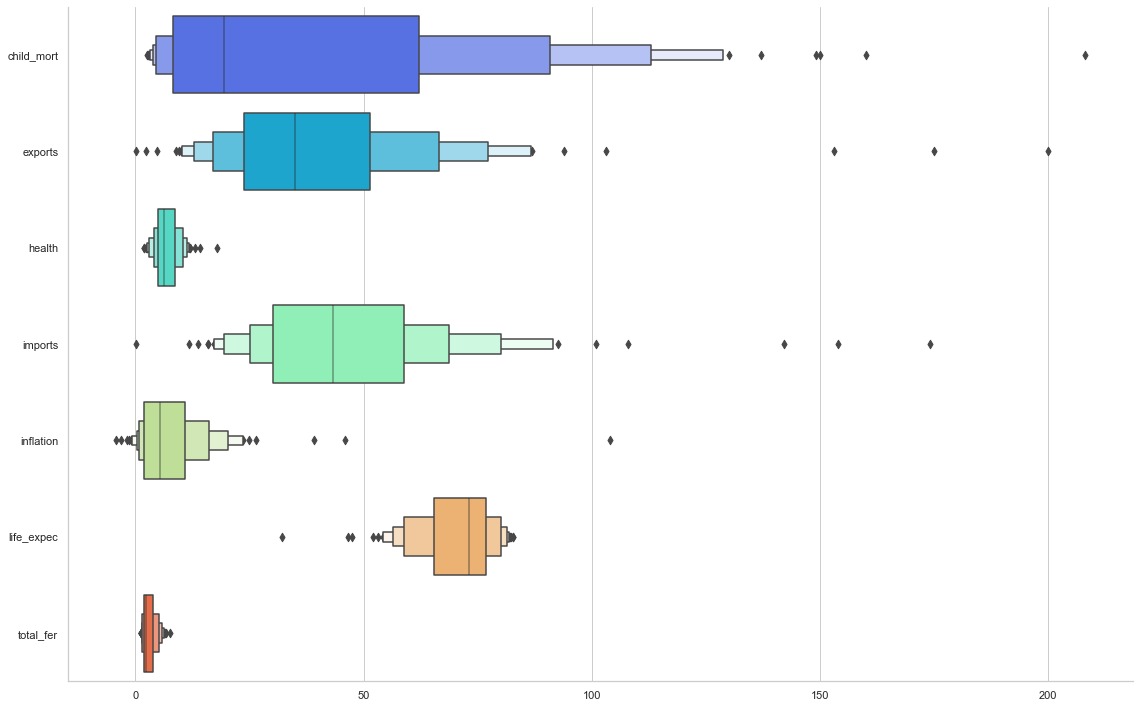

In [12]:
sns.set_theme()
sns.set_style('whitegrid')
sns.catplot(data=df.drop(['income','gdpp'],axis=1), kind='boxen', orient='h', color=df.index, palette='rainbow', height=10, aspect=1.6);

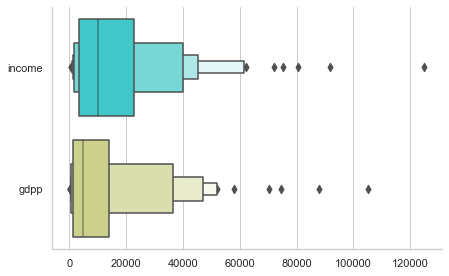

In [13]:
sns.set_theme()
sns.set_style('whitegrid')
sns.catplot(data=df[['income','gdpp']], kind='boxen', orient='h', color=df.index, palette='rainbow', height=4, aspect=1.6);

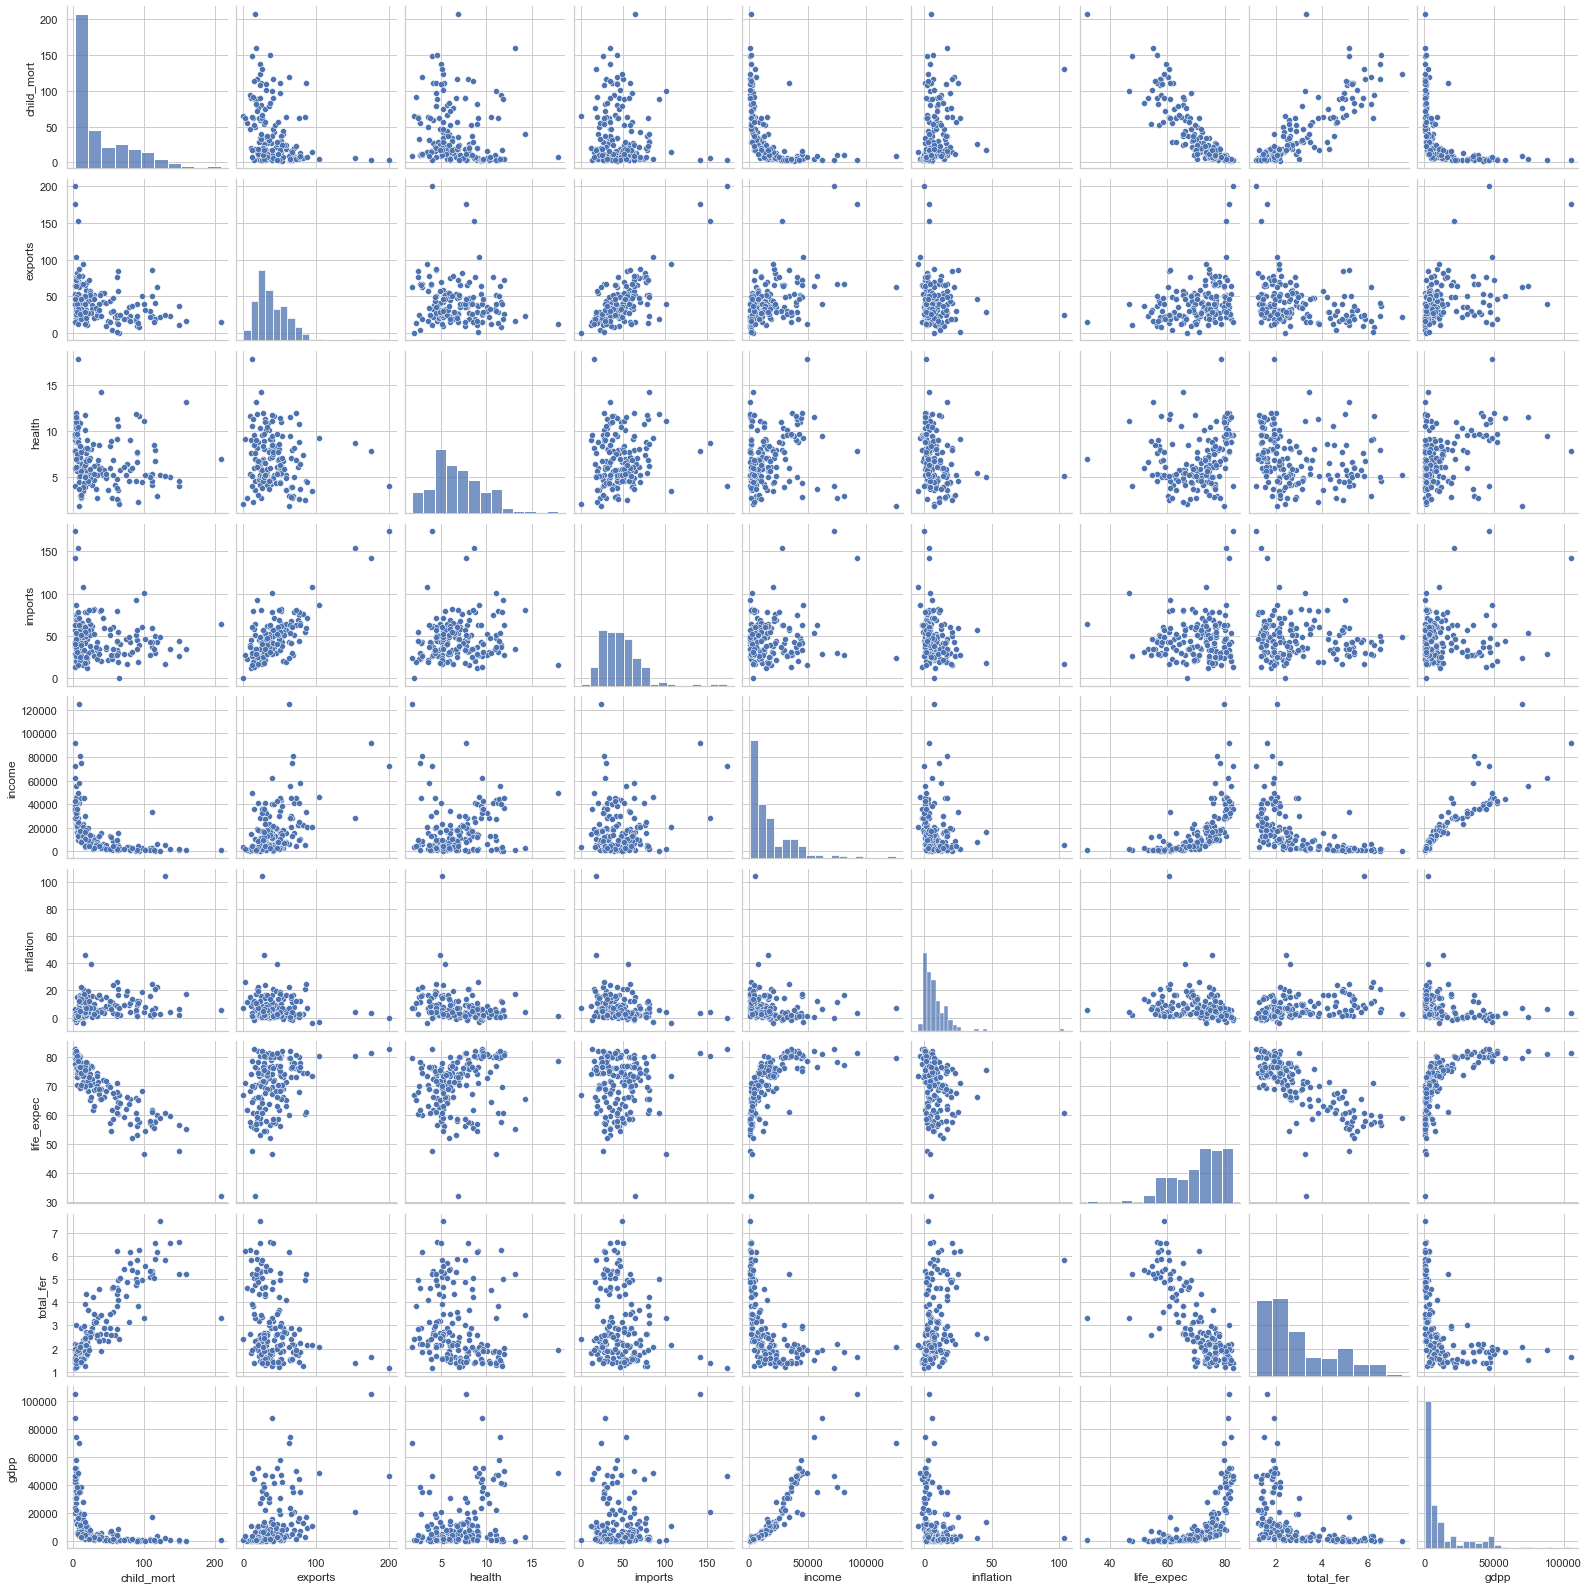

In [14]:
sns.pairplot(df)
plt.show()

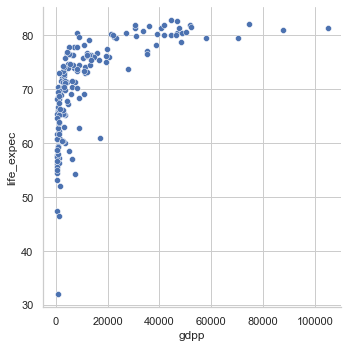

In [15]:
sns.relplot(x='gdpp',y='life_expec', data = df)#health
plt.show()

## Machine learning non supervisé

In [16]:
import pandas as pd
import numpy as np
import time

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [17]:
sc = StandardScaler()
df_sc = sc.fit_transform(df.drop('country',axis=1))

C:\Users\paulj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


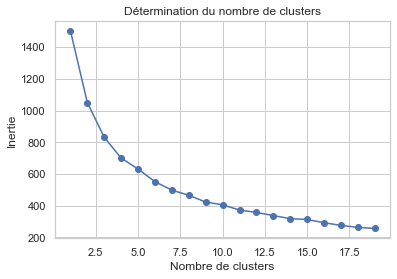

In [18]:
inertias = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_sc)
    inertias.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.plot(range(1, 20), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Détermination du nombre de clusters')
plt.show()

In [19]:
for i in range(3,9):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_sc)
    labels = kmeans.labels_
    df['prediction']=pd.DataFrame(labels)
    print(df.groupby('prediction')['country'].count())

prediction
0    47
1    84
2    36
Name: country, dtype: int64
prediction
0    88
1    46
2    30
3     3
Name: country, dtype: int64
prediction
0    52
1    28
2    46
3    38
4     3
Name: country, dtype: int64
prediction
0     3
1    42
2    28
3    45
4    48
5     1
Name: country, dtype: int64
prediction
0     4
1    44
2    54
3    25
4     3
5    36
6     1
Name: country, dtype: int64
prediction
0    38
1    38
2    29
3     4
4     1
5     4
6    31
7    22
Name: country, dtype: int64


In [20]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_sc)

labels = kmeans.labels_
labels

array([2, 0, 3, 2, 0, 3, 3, 1, 1, 3, 0, 0, 3, 0, 0, 1, 0, 2, 0, 3, 0, 2,
       3, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 3, 3, 3, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 3, 3, 3, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 3, 2, 2, 0,
       2, 0, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 0, 3, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 3, 0, 4, 0, 2, 2, 0, 0, 2, 4, 2, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3,
       1, 1, 2, 2, 1, 3, 2, 0, 0, 3, 3, 0, 1, 1, 3, 3, 2, 0, 3, 2, 0, 0,
       2, 4, 0, 0, 0, 2, 0, 1, 3, 0, 2, 0, 1, 1, 3, 2, 0, 2, 2, 3, 0, 3,
       0, 2, 0, 1, 1, 1, 3, 3, 0, 3, 0, 2, 2])

In [21]:
df['prediction']=pd.DataFrame(labels)

In [22]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,prediction
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


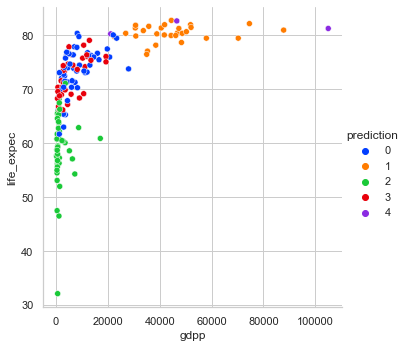

In [23]:
sns.relplot(x='gdpp',y='life_expec', data = df,hue='prediction',palette='bright')#health
plt.show()

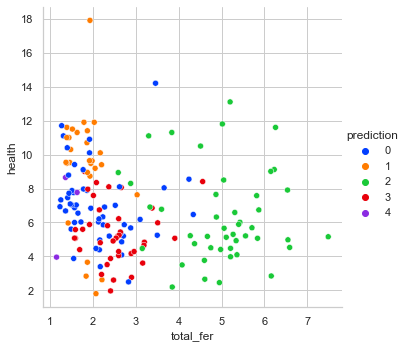

In [24]:
sns.relplot(x='total_fer',y='health', data = df,hue='prediction',palette='bright')#health
plt.show()

In [25]:
df[df['prediction']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,prediction
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,0
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,0
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,0
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,0
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,0
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,0


In [26]:
round(df[df['prediction']==0].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
child_mort,52.0,16.97,12.05,3.20,7.75,14.50,21.65,62.00
exports,52.0,50.65,17.51,23.50,36.70,49.80,64.55,93.80
health,52.0,6.98,2.20,2.50,5.66,6.86,7.91,14.20
imports,52.0,60.44,14.07,35.00,51.05,59.20,68.78,108.00
income,52.0,13604.23,8357.13,1780.00,7297.50,12050.00,19350.00,41100.00
inflation,52.0,3.78,3.92,-4.21,1.14,2.64,6.02,15.10
life_expec,52.0,73.32,4.32,61.70,71.38,73.95,76.32,80.40
total_fer,52.0,2.13,0.76,1.23,1.54,1.94,2.63,4.34
gdpp,52.0,8024.92,6383.48,786.00,3290.00,6130.00,11475.00,28000.00
prediction,52.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [27]:
df[df['prediction']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,prediction
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1


In [28]:
round(df[df['prediction']==1].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
child_mort,28.0,5.05,2.20,2.60,3.88,4.25,5.30,10.80
exports,28.0,45.04,22.22,12.40,27.85,41.00,62.72,103.00
health,28.0,9.24,3.36,1.81,8.90,9.59,11.08,17.90
imports,28.0,38.68,17.45,13.60,28.00,31.95,44.65,86.50
income,28.0,46371.43,20020.97,27200.00,36100.00,40900.00,46625.00,125000.00
inflation,28.0,2.86,4.36,-3.22,0.67,1.19,3.35,16.70
life_expec,28.0,80.42,1.48,76.50,79.88,80.45,81.43,82.80
total_fer,28.0,1.82,0.36,1.37,1.48,1.87,1.99,3.03
gdpp,28.0,44803.57,14467.37,22500.00,35225.00,43150.00,49100.00,87800.00
prediction,28.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [29]:
df[df['prediction']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,prediction
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2


In [30]:
round(df[df['prediction']==2].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
child_mort,46.0,94.18,32.67,52.50,64.62,90.25,111.00,208.00
exports,46.0,28.93,18.30,2.20,16.88,23.80,36.95,85.80
health,46.0,6.34,2.67,2.20,4.51,5.48,7.85,13.10
imports,46.0,42.50,17.89,17.20,29.70,41.50,49.52,101.00
income,46.0,3752.02,5549.39,609.00,1390.00,1860.00,3357.50,33700.00
inflation,46.0,11.92,15.67,0.88,3.94,8.86,16.48,104.00
life_expec,46.0,59.01,6.40,32.10,56.58,59.40,62.65,71.10
total_fer,46.0,5.02,1.05,2.59,4.53,5.08,5.67,7.49
gdpp,46.0,1866.35,2963.42,231.00,548.50,833.00,1422.50,17100.00
prediction,46.0,2.00,0.00,2.00,2.00,2.00,2.00,2.00


In [31]:
df[df['prediction']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,prediction
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,3
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,3
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,3
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,3
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,3
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980,3
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.410,74.2,1.80,11200,3
33,Chile,8.7,37.700,7.96,31.3000,19400,8.960,79.1,1.88,12900,3
34,China,15.7,26.300,5.07,22.6000,9530,6.940,74.6,1.59,4560,3
35,Colombia,18.6,15.900,7.59,17.8000,10900,3.860,76.4,2.01,6250,3


In [32]:
round(df[df['prediction']==3].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
child_mort,38.0,26.91,14.44,8.70,16.73,20.90,35.15,64.40
exports,38.0,29.26,14.41,0.11,20.50,27.05,36.98,65.70
health,38.0,5.37,1.74,1.97,4.29,5.08,6.16,9.01
imports,38.0,31.04,12.77,0.07,22.45,30.60,36.55,60.30
income,38.0,12964.47,10047.53,1990.00,6505.00,9910.00,17325.00,45400.00
inflation,38.0,12.29,9.07,0.98,6.96,9.40,15.82,45.90
life_expec,38.0,72.62,3.69,66.20,69.30,73.60,75.70,79.10
total_fer,38.0,2.52,0.65,1.57,2.10,2.48,2.83,4.56
gdpp,38.0,6175.42,4940.84,592.00,2690.00,4610.00,9992.50,19300.00
prediction,38.0,3.00,0.00,3.00,3.00,3.00,3.00,3.00


In [33]:
df[df['prediction']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,prediction
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,4
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,4
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,4


In [34]:
round(df[df['prediction']==4].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
child_mort,3.0,4.13,2.31,2.80,2.80,2.80,4.80,6.80
exports,3.0,176.00,23.52,153.00,164.00,175.00,187.50,200.00
health,3.0,6.79,2.49,3.96,5.86,7.77,8.21,8.65
imports,3.0,156.67,16.17,142.00,148.00,154.00,164.00,174.00
income,3.0,64033.33,32460.64,28300.00,50200.00,72100.00,81900.00,91700.00
inflation,3.0,2.47,2.18,-0.05,1.79,3.62,3.72,3.83
life_expec,3.0,81.43,1.21,80.30,80.80,81.30,82.00,82.70
total_fer,3.0,1.38,0.24,1.15,1.25,1.36,1.50,1.63
gdpp,3.0,57566.67,43011.67,21100.00,33850.00,46600.00,75800.00,105000.00
prediction,3.0,4.00,0.00,4.00,4.00,4.00,4.00,4.00


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [36]:
clf = AgglomerativeClustering(n_clusters=5)
clf.fit(df_sc)
labels = clf.labels_

df['prediction2']=pd.DataFrame(labels)

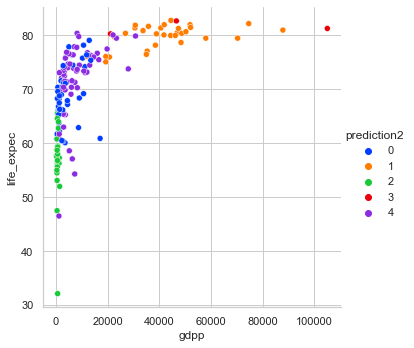

In [37]:
sns.relplot(x='gdpp',y='life_expec', data = df,hue='prediction2',palette='bright')#health
plt.show()

In [38]:
dic1 = {0:'assez développé',1:'très développé',2:'peu développé',3:'développement moyen',4:'très développé - 2'}
dic2 = {0:'développement moyen',1:'très développé',2:'peu développé',3:'très développé - 2',4:'assez développé'}

df = df.set_index('country')
df['prediction'] = df['prediction'].replace(dic1)
df['prediction2'] = df['prediction2'].replace(dic2)

pd.set_option('display.max_rows', None)
display(df)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,prediction,prediction2
country,,,,,,,,,,,
Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,peu développé,peu développé
Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,assez développé,assez développé
Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,développement moyen,développement moyen
Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,peu développé,développement moyen
Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,assez développé,assez développé
Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,développement moyen,développement moyen
Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,développement moyen,assez développé
Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900,très développé,très développé
Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,très développé,très développé


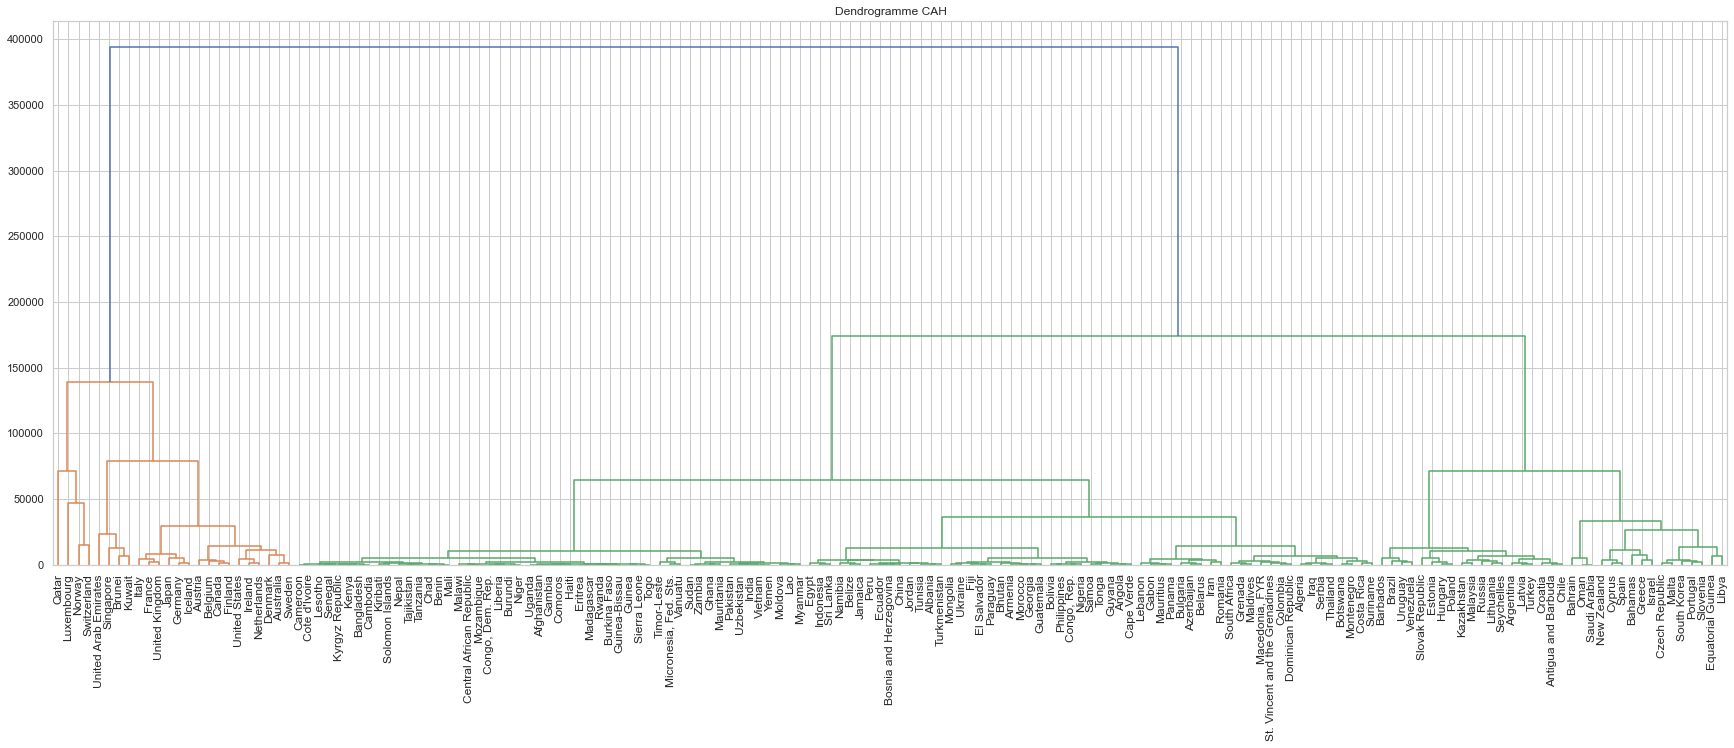

In [39]:
plt.figure(figsize=(30,10))
Z = linkage(df.drop(['prediction','prediction2'],axis=1), method='ward',metric='euclidean')

plt.title("Dendrogramme CAH")

dendrogram(Z,labels = df.index, leaf_rotation = 90, leaf_font_size=12)
plt.show()